#### Household Electrical Power Consumption 

Muksana Khatun (17/2/2023)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.style as style
import datetime
import re
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import linear_model
import statsmodels.api as sm
#importing all the libraries

In [2]:
params = {
    'axes.labelsize': 10,
    'axes.titlesize': 11,
    'font.size': 11,
    'legend.fontsize': 6, 
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'font.family': 'cursive',
}
plt.rcParams.update(params)
#setting all the parameter

In [3]:
df = pd.read_csv('household_power_consumption.txt', sep=';')
#reading file from text file

C:\Users\Nitu\AppData\Local\Temp\ipykernel_9836\2643789217.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.txt', sep=';')


#### Checking dataset

In [4]:
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


#### Data description
1. Global active power is the real power consumption i.e. the power consumed by electrical appliances other than the sub metered appliances.It is basically called wattfull power.
2. Global reactive power is the power which bounces back and froth without any usage or leakage. It is the imaginary power consumption. It is basically called wattless power.
3. Utility sub-metering typically replaces utilities-included rental arrangements, enabling multi-tenant building owners and facility managers to measure util- ity usage for each building suite or space for more accurate billing and greater energy savings.
4. Global intensity: household global minute-averaged current intensity (in ampere)

In [5]:
df.sample(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1422540,30/8/2009,14:24:00,2.720,0.690,237.990,12.000,1.000,1.000,18.0
1103709,21/1/2009,04:33:00,0.368,0.188,245.170,1.600,0.000,1.000,0.0
362378,25/8/2007,09:02:00,0.112,0.000,241.350,0.400,0.000,0.000,0.0
791966,18/6/2008,16:50:00,3.278,0.428,240.200,14.200,16.000,35.000,1.0
508149,4/12/2007,14:33:00,1.394,0.110,241.350,5.800,0.000,0.000,17.0


In [6]:
df.shape

(2075259, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### **Converting data types**

In [8]:
df.dtypes
#checking datatype

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [9]:
df['Global_active_power'] = df['Global_active_power'].str.replace('?','nan')
df['Global_reactive_power'] = df['Global_reactive_power'].str.replace('?','nan')
df['Voltage'] = df['Voltage'].str.replace('?','nan')
df['Global_intensity'] = df['Global_intensity'].str.replace('?','nan')
df['Sub_metering_1'] = df['Sub_metering_1'].str.replace('?','nan')
df['Sub_metering_2'] = df['Sub_metering_2'].str.replace('?','nan')
# replacing string '?' with nan value

C:\Users\Nitu\AppData\Local\Temp\ipykernel_9836\3200452305.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Global_active_power'] = df['Global_active_power'].str.replace('?','nan')
C:\Users\Nitu\AppData\Local\Temp\ipykernel_9836\3200452305.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Global_reactive_power'] = df['Global_reactive_power'].str.replace('?','nan')
C:\Users\Nitu\AppData\Local\Temp\ipykernel_9836\3200452305.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Voltage'] = df['Voltage'].str.r

In [10]:
df.Global_active_power = df.Global_active_power.astype('float64')
df.Global_reactive_power = df.Global_reactive_power.astype('float64')
df.Voltage = df.Voltage.astype('float64')
df.Global_intensity = df.Global_intensity.astype('float64')
df.Sub_metering_1 = df.Sub_metering_1.astype('float64')
df.Sub_metering_2 = df.Sub_metering_2.astype('float64')
# converting some string columns to float

In [11]:
df['date_parsed'] = pd.to_datetime(df['Date'],infer_datetime_format=True)
df['time_parsed'] = pd.to_datetime(df['Time'],infer_datetime_format=True)
# converting date & and time columns to pandas datetime

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 11 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   date_parsed            datetime64[ns]
 10  time_parsed            datetime64[ns]
dtypes: datetime64[ns](2), float64(7), object(2)
memory usage: 174.2+ MB


In [13]:
df.describe()
#summary descriptive statistic

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.005637e+06,2.005637e+06,2.005637e+06,2.005637e+06,2.005637e+06,2.005637e+06,2.049280e+06
mean,1.089791e+00,1.239256e-01,2.408279e+02,4.620603e+00,1.120348e+00,1.303265e+00,6.458447e+00
std,1.058952e+00,1.128426e-01,3.210366e+00,4.450569e+00,6.151728e+00,5.831675e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.390000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.960000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.526000e+00,1.940000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [14]:
df.value_counts()

Date        Time      Global_active_power  Global_reactive_power  Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  date_parsed  time_parsed        
1/1/2007    00:00:00  2.580                0.136                  241.97   10.6              0.0             0.0             0.0             2007-01-01   2023-02-17 00:00:00    1
28/12/2008  07:39:00  1.310                0.052                  244.59   5.2               0.0             0.0             0.0             2008-12-28   2023-02-17 07:39:00    1
            07:37:00  1.302                0.054                  244.48   5.2               0.0             0.0             0.0             2008-12-28   2023-02-17 07:37:00    1
            07:36:00  1.294                0.052                  243.92   5.2               0.0             0.0             0.0             2008-12-28   2023-02-17 07:36:00    1
            07:35:00  1.306                0.052                  244.45   5.2               0.0             0

In [15]:
print('Global_active_power', ':' , df.Global_active_power.unique().shape)
print('Voltage', ':' , df.Voltage.unique().shape)
print('Global_reactive_power', ':' , df.Global_reactive_power.unique().shape)
print('Global_intensity', ':' , df.Global_intensity.unique().shape)
print('submetering_1', ':' , df.Sub_metering_1.unique().shape)
print('submetering_2', ':' , df.Sub_metering_2.unique().shape)
print('submetering_3', ':' , df.Sub_metering_3.unique())
# checking for unique value in each columns

Global_active_power : (4181,)
Voltage : (2835,)
Global_reactive_power : (533,)
Global_intensity : (221,)
submetering_1 : (89,)
submetering_2 : (82,)
submetering_3 : [17. 16. 18.  9.  0.  5. 19. 10. 20.  8.  4.  2.  3. 11. 13.  6. 15. nan
 12.  1. 14.  7. 23. 25. 26. 28. 27. 21. 22. 29. 24. 30. 31.]


In [16]:
df.Sub_metering_3.value_counts()

0.0     852092
1.0     471868
18.0    353163
17.0    156593
19.0    121326
12.0     16726
16.0     15831
11.0     11282
29.0      6931
13.0      5339
20.0      4670
28.0      4364
10.0      3309
30.0      3119
9.0       2011
6.0       1993
2.0       1970
7.0       1954
3.0       1935
8.0       1922
4.0       1913
5.0       1899
27.0      1337
26.0       771
21.0       726
23.0       714
22.0       700
25.0       689
24.0       664
15.0       653
14.0       538
31.0       278
Name: Sub_metering_3, dtype: int64

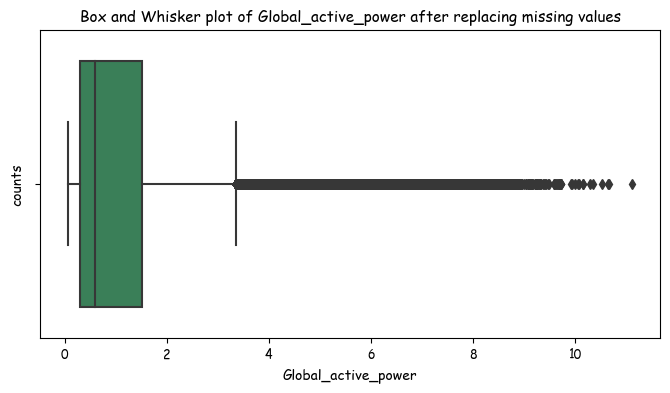

In [17]:
plt.figure(figsize = (8,4))
sns.boxplot(x=df["Global_active_power"],color='seagreen')
plt.title('Box and Whisker plot of Global_active_power after replacing missing values')
plt.xlabel('Global_active_power')
plt.ylabel('counts')
plt.show()

This boxplot shows in global_active_power columns are right skewed and  have many values lies after the max value which consider as outliers.

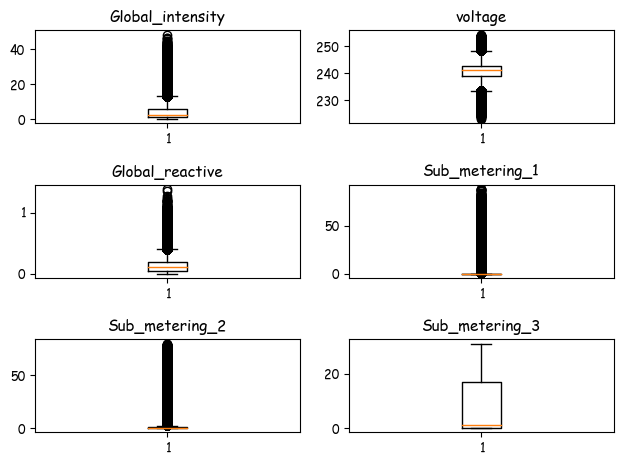

In [53]:
fig, axes = plt.subplots(nrows=3, ncols=2)
ax0, ax1, ax2, ax3, ax4, ax5= axes.flatten()

ax0.boxplot(df.Global_intensity )
ax0.set_title('Global_intensity')

ax1.boxplot(df.Voltage)
ax1.set_title('voltage')

ax2.boxplot(df.Global_reactive_power )
ax2.set_title('Global_reactive')

ax3.boxplot(df.Sub_metering_1)
ax3.set_title('Sub_metering_1')

ax4.boxplot(df.Sub_metering_2 )
ax4.set_title('Sub_metering_2')

ax5.boxplot(df.Sub_metering_3)
ax5.set_title('Sub_metering_3')

fig.tight_layout()
plt.show()

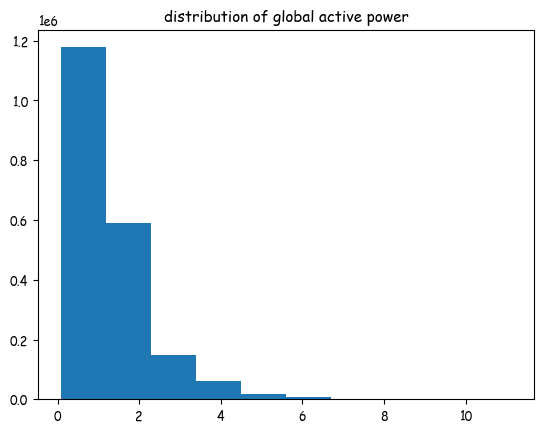

In [19]:
x= df['Global_active_power']
# We can set the number of bins with the `bins` kwarg
plt.hist(x)
plt.title('distribution of global active power')
plt.show()

We can see the data distribution of global active and   right skewed. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


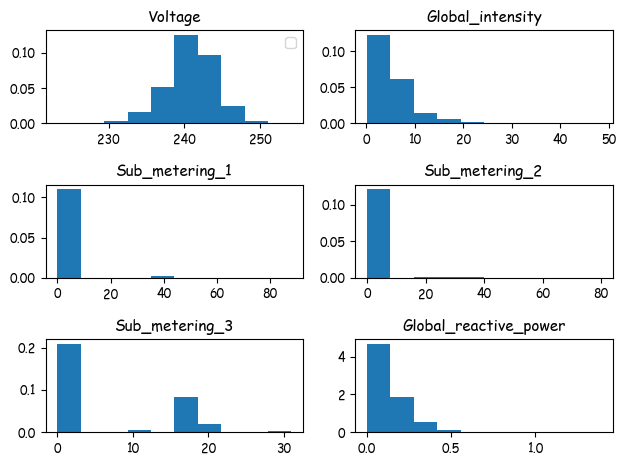

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2)
ax0, ax1, ax2, ax3, ax4, ax5= axes.flatten()

ax0.hist(df.Voltage, density=True, histtype='bar')
ax0.legend(prop={'size': 10})
ax0.set_title('Voltage')

ax1.hist(df.Global_intensity, density=True, histtype='bar', stacked=True)
ax1.set_title('Global_intensity')

ax2.hist(df.Sub_metering_1,  density=True, histtype='bar', stacked=True)
ax2.set_title('Sub_metering_1')

ax3.hist(df.Sub_metering_2,  density=True, histtype='bar', stacked=True)
ax3.set_title('Sub_metering_2')

ax4.hist(df.Sub_metering_3,  density=True, histtype='bar', stacked=True)
ax4.set_title('Sub_metering_3')

ax5.hist(df.Global_reactive_power,  density=True, histtype='bar', stacked=True)
ax5.set_title('Global_reactive_power')

fig.tight_layout()
plt.show()
#data distribution of other columns

global intensity, submetering1, submetering2,  submetering3 ,global reactive power are right skewed. there is no skewness in voltage.

### **Handling missing values**

In [21]:
df.isnull().sum()
#gives total missing values present in each columns

Date                         0
Time                         0
Global_active_power      69622
Global_reactive_power    69622
Voltage                  69622
Global_intensity         69622
Sub_metering_1           69622
Sub_metering_2           69622
Sub_metering_3           25979
date_parsed                  0
time_parsed                  0
dtype: int64

In [22]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
round(missing_value_df,2)
#finding percentage of missing values and put it into data frame

,column_name,percent_missing
Date,Date,0.00
Time,Time,0.00
Global_active_power,Global_active_power,3.35
Global_reactive_power,Global_reactive_power,3.35
Voltage,Voltage,3.35
Global_intensity,Global_intensity,3.35
Sub_metering_1,Sub_metering_1,3.35
Sub_metering_2,Sub_metering_2,3.35
Sub_metering_3,Sub_metering_3,1.25
date_parsed,date_parsed,0.00


In [23]:
#df['Global_active_power'].fillna(int(df['Global_active_power'].median()), inplace=True)
df['Global_active_power'].fillna((df['Global_active_power'].median()), inplace=True)
df['Global_reactive_power'].fillna((df['Global_reactive_power'].median()), inplace=True)
df['Voltage'].fillna((df['Voltage'].median()), inplace=True)
df['Global_intensity'].fillna((df['Global_intensity'].median()), inplace=True)
df['Sub_metering_1'].fillna((df['Sub_metering_1'].median()), inplace=True)
df['Sub_metering_2'].fillna((df['Sub_metering_2'].median()), inplace=True)
df['Sub_metering_3'].fillna((df['Sub_metering_3'].median()), inplace=True)
#replacing missing values with null values

In [24]:
df.isnull().sum()
#sum of null values after replacing them

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
date_parsed              0
time_parsed              0
dtype: int64

### Handling Outliers

In [25]:
median = df.Global_active_power.median()
max_threshold = df.Global_active_power.quantile(.995)
df["Global_active_power"] = np.where(df["Global_active_power"] > max_threshold, median,df['Global_active_power'])
#replacing outlier with median value

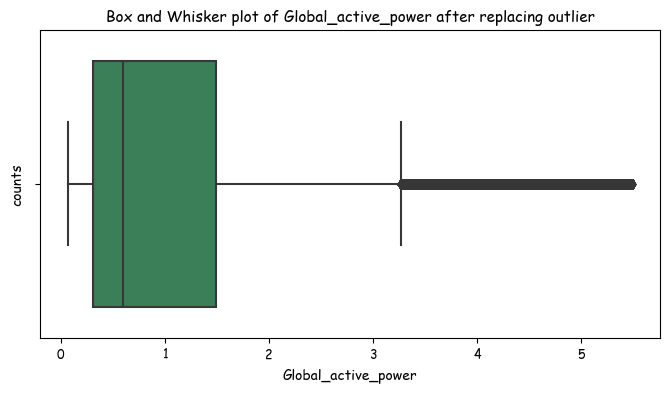

In [26]:
plt.figure(figsize = (8,4))
sns.boxplot(x=df["Global_active_power"],color='seagreen')
plt.title('Box and Whisker plot of Global_active_power after replacing outlier')
plt.xlabel('Global_active_power')
plt.ylabel('counts')
plt.show()
#boxplot of global active power after replacing outliers

In [27]:
#df["Global_reactive_power"] = np.where(df["Global_reactive_power"] > (df.Global_reactive_power.quantile(.995)), df.Global_reactive_power.median() ,df['Global_reactive_power'])
#df["Global_intensity"] = np.where(df["Global_intensity"] > (df.Global_intensity.quantile(.935)), df.Global_intensity.median() ,df['Global_intensity'])

#df["Voltage"] = np.where(((df["Voltage"] > (df.Voltage.quantile(.995)))& (df["Voltage"] < (df.Voltage.quantile(.25)))), df.Voltage.median() ,df['Voltage'])

#df["Sub_metering_1"] = np.where(df["Sub_metering_1"] > (df.Sub_metering_1.quantile(.95)), df.Sub_metering_1.median() ,df['Sub_metering_1'])
#df["Sub_metering_2"] = np.where(df["Sub_metering_2"] > (df.Sub_metering_2.quantile(.95)), df.Sub_metering_2.median() ,df['Sub_metering_2'])
#df["Sub_metering_3"] = np.where(df["Sub_metering_3"] > (df.Sub_metering_2.quantile(.995)), df.Sub_metering_3.median() ,df['Sub_metering_3'])
#replacing outlier with median value

In [28]:
df['total_submetering'] = df['Sub_metering_1']+df['Sub_metering_2']+df['Sub_metering_3']

In [29]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,total_submetering
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.044862e+00,1.231229e-01,2.408336e+02,4.552815e+00,1.082762e+00,1.259542e+00,6.390116e+00,8.732420e+00
std,9.768098e-01,1.110172e-01,3.156207e+00,4.390379e+00,6.051020e+00,5.737820e+00,8.406114e+00,1.274490e+01
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.120000e-01,5.000000e-02,2.390900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.960000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,1.494000e+00,1.900000e-01,2.427800e+02,6.200000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.800000e+01
max,5.490000e+00,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.340000e+02


### **EDA**

In [30]:
corr = df.corr()
corr
# correlation between the columns

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,total_submetering
Global_active_power,1.000000,0.237015,-0.367585,0.918718,0.408936,0.316366,0.643565,0.761059
Global_reactive_power,0.237015,1.000000,-0.114986,0.269166,0.125621,0.140981,0.090017,0.182485
Voltage,-0.367585,-0.114986,1.000000,-0.408330,-0.196194,-0.168222,-0.263572,-0.342727
Global_intensity,0.918718,0.269166,-0.408330,1.000000,0.489781,0.442481,0.619890,0.840604
Sub_metering_1,0.408936,0.125621,-0.196194,0.489781,1.000000,0.056050,0.103341,0.568174
Sub_metering_2,0.316366,0.140981,-0.168222,0.442481,0.056050,1.000000,0.081140,0.530334
Sub_metering_3,0.643565,0.090017,-0.263572,0.619890,0.103341,0.081140,1.000000,0.745161
total_submetering,0.761059,0.182485,-0.342727,0.840604,0.568174,0.530334,0.745161,1.000000


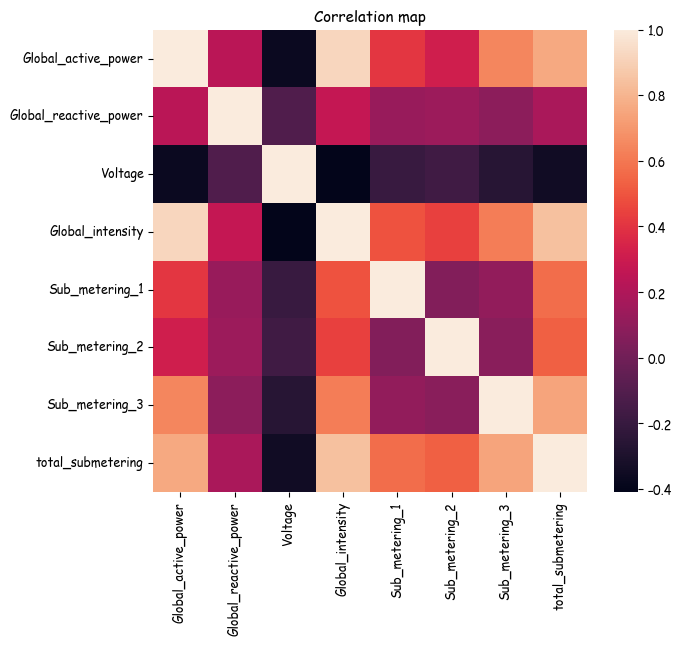

In [31]:
plt.figure(figsize = (7,6))
sns.heatmap(df.corr())
plt.title('Correlation map')
plt.show()

>this shows correlation between all the variables except date columns. from here we can see some of the variables has strong correlation with other variable.

>there is positive  strong correlation between global intensity and global active power...
there is a negative correlation between voltage and( global intensity and global active power)

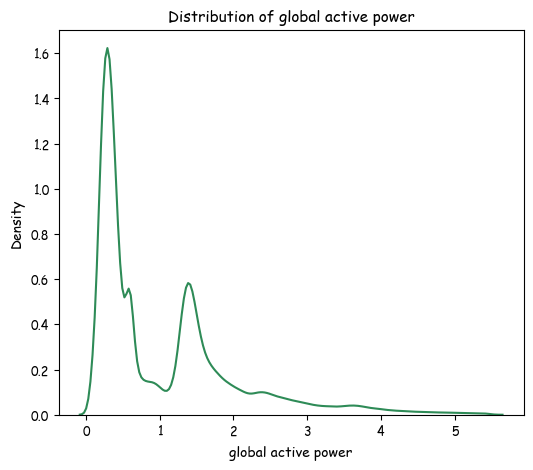

In [32]:
plt.figure(figsize = (6,5))
sns.kdeplot(data=df, x="Global_active_power", color='seagreen')
plt.title('Distribution of global active power')
plt.xlabel('global active power')
plt.ylabel('Density')
plt.show()

Most of the value of global active power is spreaded from 0-2

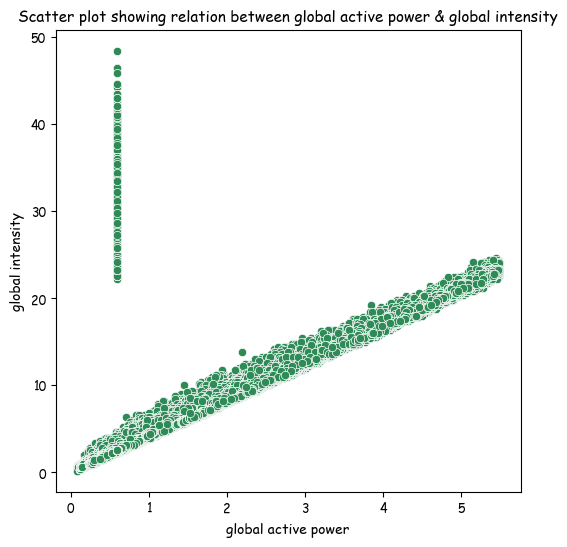

In [33]:
plt.figure(figsize = (6,6))
sns.scatterplot(x=df['Global_active_power'], y=df['Global_intensity'],color='seagreen')
plt.title('Scatter plot showing relation between global active power & global intensity')
plt.xlabel('global active power')
plt.ylabel('global intensity')
plt.show()

There is strong correlating between global active power and globar intensity. As the power consumption increase current intensiy(global intensity) also increase and vice-versa

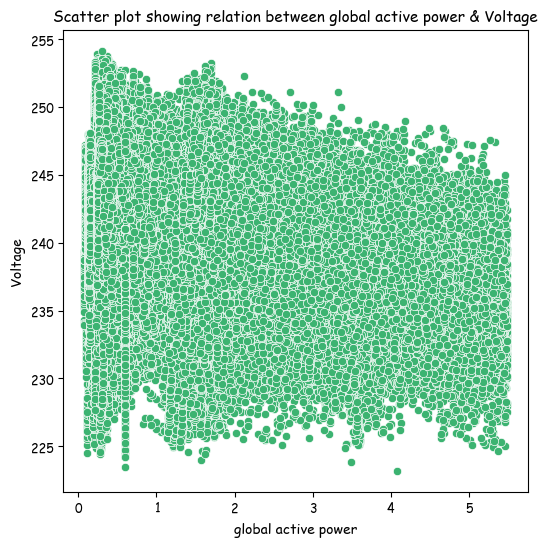

In [34]:
plt.figure(figsize = (6,6))
sns.scatterplot(x=df['Global_active_power'], y=df['Voltage'],color ='mediumseagreen')
plt.title('Scatter plot showing relation between global active power & Voltage')
plt.xlabel('global active power')
plt.ylabel('Voltage')
plt.show()

No correlation between global active power and voltage 

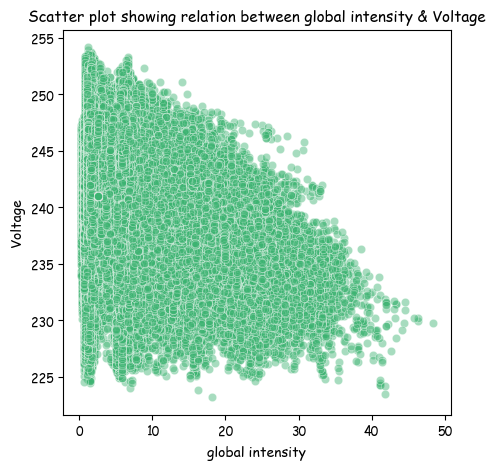

In [35]:
plt.figure(figsize = (5,5))
sns.scatterplot(x=df['Global_intensity'], y=df['Voltage'], color ='mediumseagreen' ,alpha=.45)
plt.title('Scatter plot showing relation between global intensity & Voltage')
plt.xlabel('global intensity')
plt.ylabel('Voltage')
plt.show()

Slide negative correlation between global intensity and voltage

In [36]:
year= df['date_parsed'].dt.year
year
#converting year to parsed year

0          2006
1          2006
2          2006
3          2006
4          2006
           ... 
2075254    2010
2075255    2010
2075256    2010
2075257    2010
2075258    2010
Name: date_parsed, Length: 2075259, dtype: int64

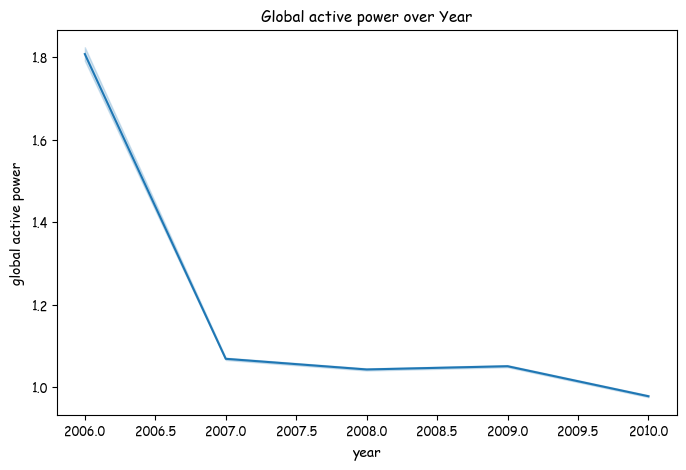

In [37]:
plt.figure(figsize = (8,5))
sns.lineplot(data= df, x=df['date_parsed'].dt.year, y='Global_active_power')
plt.title('Global active power over Year')
plt.xlabel('year')
plt.ylabel('global active power')
plt.show()

global active power over the year decrease.huge fall in global a ctive power from 2006 to 2007. after 2007 decrease is less

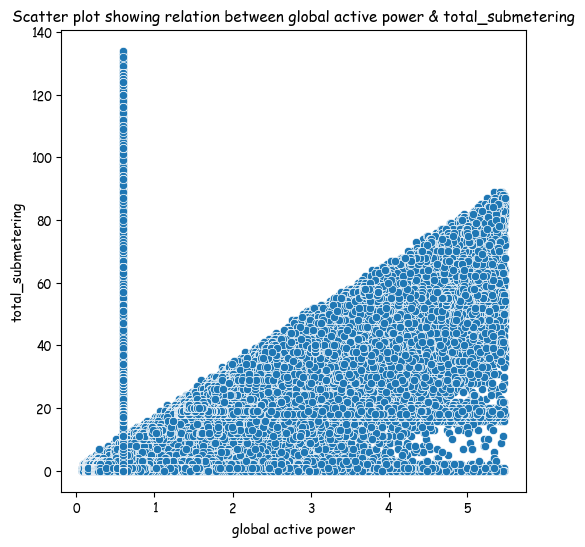

In [38]:
plt.figure(figsize = (6,6))
sns.scatterplot(x=df['Global_active_power'], y=df['total_submetering'])
plt.title('Scatter plot showing relation between global active power & total_submetering')
plt.xlabel('global active power')
plt.ylabel('total_submetering')
plt.show()

there is relation between global active power and total submetering as global active powe increase total submetering also increase.

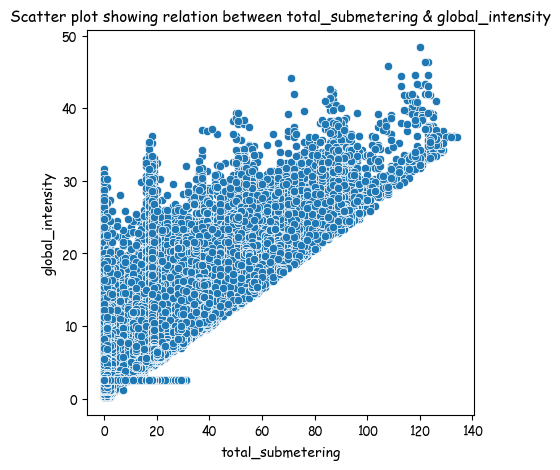

In [39]:
plt.figure(figsize = (5,5))
sns.scatterplot(x=df['total_submetering'], y=df['Global_intensity'])
plt.title('Scatter plot showing relation between total_submetering & global_intensity')
plt.xlabel('total_submetering')
plt.ylabel('global_intensity')
plt.show()

positive correlation between total submetering and global_intensity

### Linear Regression analysis

In [40]:
Y = df['Global_intensity']
X = df['Global_active_power']
X = sm.add_constant(X)
models = sm.OLS(Y,X)
results = models.fit()
results.params
results.tvalues
(results.t_test([1, 0]))
(results.f_test(np.identity(2)))
results.summary()
#modelfit

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Global_intensity   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 1.123e+07
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:50:21   Log-Likelihood:            -4.0867e+06
No. Observations:             2075259   AIC:                         8.173e+06
Df Residuals:                 2075257   BIC:                         8.174e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2383      0.002    135.208      0.000       0.235       0.242
Global_active_power     4.1293      0.001   3351.305      0.000       4.127       4.132
==============================================================================
Omnibus:                  3819814.543   Durbin-Watson:                   0.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3768804944.658
Skew:                          14.170   Prob(JB):                         0.00
Kurtosis:                     209.839   Cond. No.                         2.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
Y = df[['Global_intensity','Voltage','Global_intensity','total_submetering']]
X = df['Global_active_power']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params
#parameter of models

,0,1,2,3
const,0.238289,242.074638,0.238289,-1.642951
Global_active_power,4.129276,-1.187719,4.129276,9.929892


except global active power and voltage all other are positively corelated. negative correlation between global active power and voltage.

In [42]:

x = df[['Global_intensity','Voltage','Global_intensity','total_submetering']]
y = df['Global_active_power']
 

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


x = sm.add_constant(x)
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)
# regression model

Intercept: 
 -0.57402373657483
Coefficients: 
 [ 0.1061926   0.00281331  0.1061926  -0.00293215]
                             OLS Regression Results                            
Dep. Variable:     Global_active_power   R-squared:                       0.845
Model:                             OLS   Adj. R-squared:                  0.845
Method:                  Least Squares   F-statistic:                 3.758e+06
Date:                 Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                         16:50:22   Log-Likelihood:            -9.6456e+05
No. Observations:              2075259   AIC:                         1.929e+06
Df Residuals:                  2075255   BIC:                         1.929e+06
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------

#### Regression Result analysis 


1. R square :R square is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. Here, 97.2 % variation in Y can be explained by X. so, we can say that model is a good fit.
2. F statistic :F test tells the goodness of fit of a regression. as F statistis value is greter than 1 we reject the null hypothesis. So there is a relation between X and Y variable. (x= Global_intensity, Voltage, Global_intensity , total_submetering // y = Global_active_power)
3. Since 0 does not lie in any of the intervals of rsquare and BIC so we will reject the null hypothesis
4. This difference is statistically significant, because the p-value, shown under the column labeled P>|t|, is less than the significance value of 0.05. This means that there is a strong evidence of a linear association between the target (global active power) and other variables. As the p-value is closer to 0: there is a strong relationship between the variable and the target.
5. Skew is a measurement of symmetry in our data, so in this dataset no symmetry . 

In [43]:
residuals= model.resid
#finding residuals 

### Assumptions for Linear Regression

In [44]:
#sns.pairplot(df)
#plt.show()

1. Linearity

C:\Users\Nitu\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


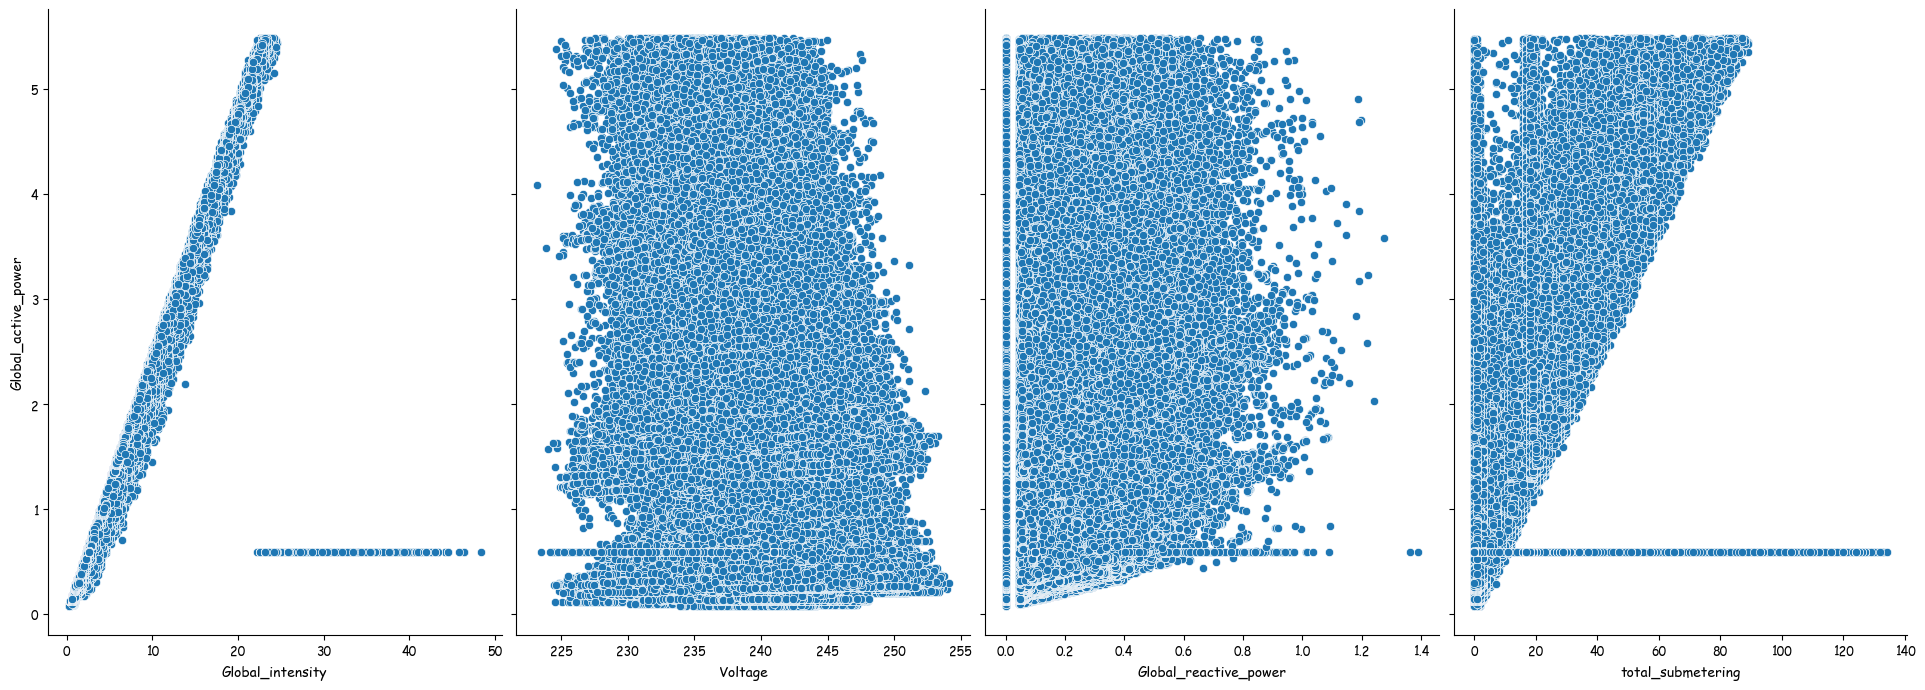

In [45]:
sns.pairplot(df, x_vars=['Global_intensity','Voltage','Global_reactive_power','total_submetering'], y_vars='Global_active_power', size=7, aspect=0.7)
plt.show()

By looking at the plots we can see that with the global active power variable form an accurately linear shape with global_intensity.  there is relationship with global active power and total submetering but with voltage and global reactive power seems to hardly have any specific shape. So it shows that a linear regression fitting might not be the best model for it. A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc.

2. Mean of Residuals

In [46]:
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -3.666956781131323e-12


Very close to zero so all good here.

3. Check for Homoscedasticity
>Homoscedasticity means that the error doesn’t doesn’t change across all the values of the independent variable.
We can easily check this with the help of The White Test.
We can find it in Python’s Statsmodels libaray. The White test gives us a direct answer without having to plot graphs.

In [47]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

In [48]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 1227690.4701324326, 'Test Statistic p-value': 0.0, 'F-Statistic': 333996.384385441, 'F-Test p-value': 0.0}


The White Test has the null hypothesis that the errors are have same variance or homoscedastic. Having a p-value ≤ 0.05 would indicate that the null hypothesis is rejected, hence Heteroscedasticity.

C:\Users\Nitu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


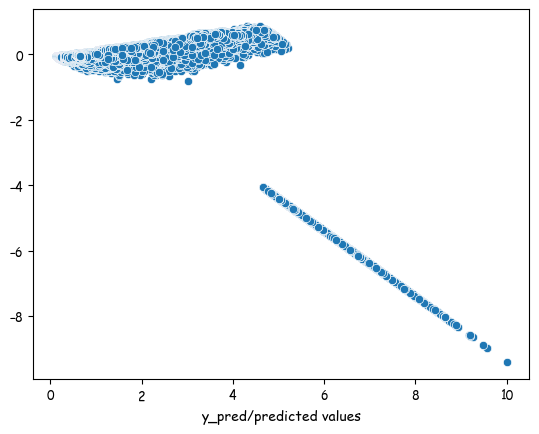

In [49]:
sns.scatterplot(predictions,residuals)
plt.xlabel('y_pred/predicted values')
plt.show()

4. Check for Normality of error terms/residuals
Errors are normally distributed

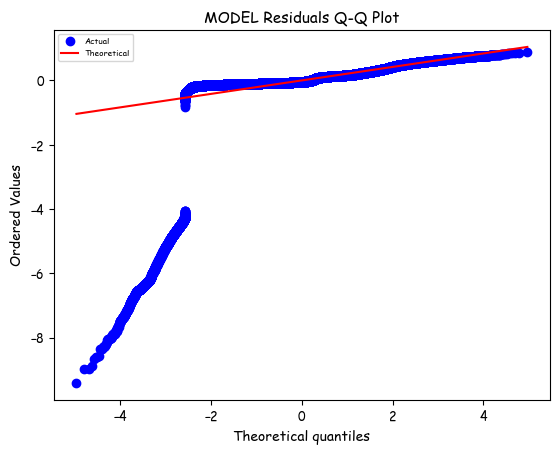

In [50]:
#Import library
from scipy import stats
stats.probplot(model.resid, dist="norm", plot= plt)
plt.title("MODEL Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])
plt.show()

residuals doesn't fall into stright line. skew to left

C:\Users\Nitu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


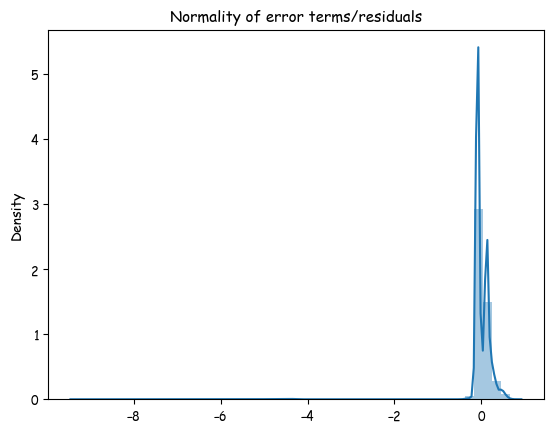

In [51]:
sns.distplot(residuals,kde=True)
plt.title('Normality of error terms/residuals')
plt.show()

Skewed to left. The residual terms are pretty much distributed to the left for the number of test points we took. 

***5. No autocorrelation of residuals***

sns.lineplot(predictions,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

6. No perfect multicollinearity

sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True) 

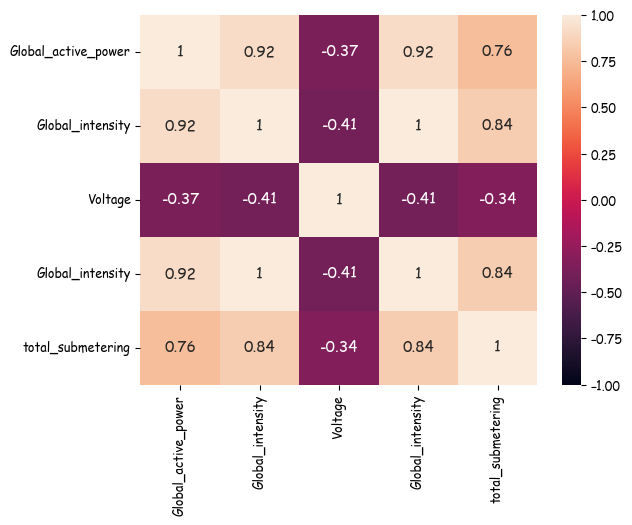

In [52]:
sns.heatmap(df[['Global_active_power','Global_intensity','Voltage','Global_intensity','total_submetering']].corr(),vmin=-1,annot= True)
plt.show()


We can already see from the heatmap that there is a significant correlation between global intensity and total submetering. This is not a good sign for model.